In [15]:
import sys
sys.path.append("..")

In [2]:
import dataset
import matplotlib.pyplot as plt
import numpy as np

from midi import *

In [3]:
array = np.array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])
print(array)

[1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1]


In [4]:
settling_frame = 10
decayed_array = np.zeros_like(array)

prev_pressed, prev_velocity = False, 0
for idx in range(len(array)):
    curr_velocity = 0
    if array[idx] <= 0:
        prev_pressed = False
    elif idx > 0:
        prev_velocity = decayed_array[idx - 1]
        if prev_velocity > 0:
            curr_velocity = prev_velocity - 1
        elif not prev_pressed:
            curr_velocity = settling_frame - 1
        prev_pressed = True
    else:
        curr_velocity = settling_frame - 1
        prev_pressed = True
    decayed_array[idx] = curr_velocity

In [5]:
print(array)
print(decayed_array)

[1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1]
[9 8 7 6 5 0 0 0 9 8 7 6 0 9 8 7 0 9 0 9]


In [8]:
def display(score, perf, head, tail) -> None:
    plt.figure(figsize=(16, 9))
    
    plt.subplot(2, 1, 1)
    plt.title("Score")
    plt.imshow(score, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ylim, _ = score.shape
    plt.ylim([0, ylim])


    plt.subplot(2, 1, 2)
    plt.title("Performance")
    plt.imshow(perf, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    ylim, _ = perf.shape
    plt.vlines(head, 0, ylim, label="head")
    plt.vlines(tail, 0, ylim, label="tail")
    plt.legend()
    plt.ylim([0, ylim])

    plt.show()

In [10]:
generator = dataset.new_generator(root="../../dataset/newbie-dataset/", slice_duration=5, note_scale=0.90, shuffle=False)

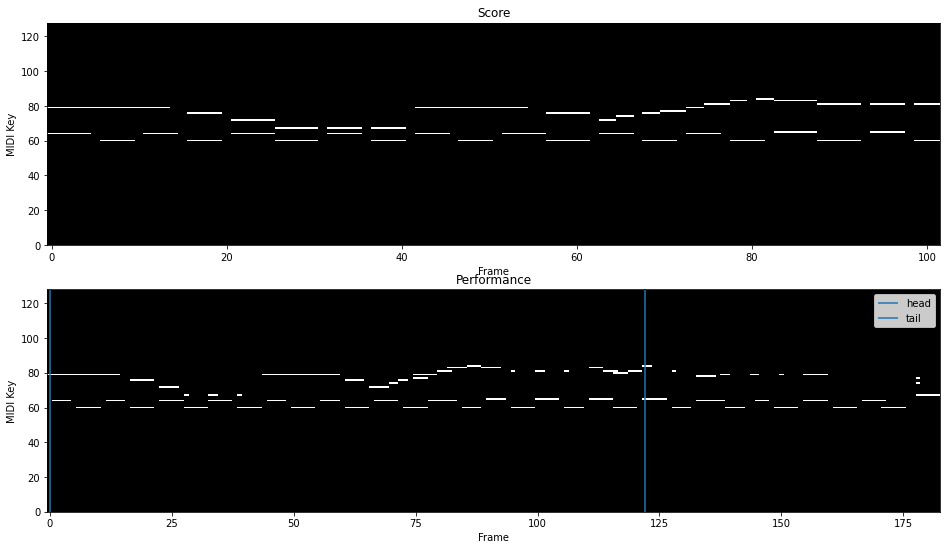

In [11]:
score_matrix, perf_matrix, (head, tail) = next(generator)
display(score_matrix, perf_matrix, head, tail)

In [12]:
score_without_decay = MIDIUnitSequenceList.from_midi_matrix(score_matrix)
print(score_without_decay)

[[Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00)], [Rest], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Rest], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Rest], [Note(64, 1.00), Note(67, 1.00)], [No

In [13]:
decay_fn = get_decay(settling_frame=10)
score_with_decay = MIDIUnitSequenceList.from_midi_matrix(score_matrix, decay_fn)
print(score_with_decay)

[[Note(64, 9.00), Note(79, 9.00)], [Note(64, 8.00), Note(79, 8.00)], [Note(64, 7.00), Note(79, 7.00)], [Note(64, 6.00), Note(79, 6.00)], [Note(64, 5.00), Note(79, 5.00)], [Note(79, 4.00)], [Note(60, 9.00), Note(79, 3.00)], [Note(60, 8.00), Note(79, 2.00)], [Note(60, 7.00), Note(79, 1.00)], [Note(60, 6.00)], [Rest], [Note(64, 9.00)], [Note(64, 8.00)], [Note(64, 7.00)], [Note(64, 6.00)], [Rest], [Note(60, 9.00), Note(76, 9.00)], [Note(60, 8.00), Note(76, 8.00)], [Note(60, 7.00), Note(76, 7.00)], [Note(60, 6.00), Note(76, 6.00)], [Rest], [Note(64, 9.00), Note(72, 9.00)], [Note(64, 8.00), Note(72, 8.00)], [Note(64, 7.00), Note(72, 7.00)], [Note(64, 6.00), Note(72, 6.00)], [Note(64, 5.00), Note(72, 5.00)], [Note(60, 9.00), Note(67, 9.00)], [Note(60, 8.00), Note(67, 8.00)], [Note(60, 7.00), Note(67, 7.00)], [Note(60, 6.00), Note(67, 6.00)], [Note(60, 5.00), Note(67, 5.00)], [Rest], [Note(64, 9.00), Note(67, 9.00)], [Note(64, 8.00), Note(67, 8.00)], [Note(64, 7.00), Note(67, 7.00)], [Note(64,

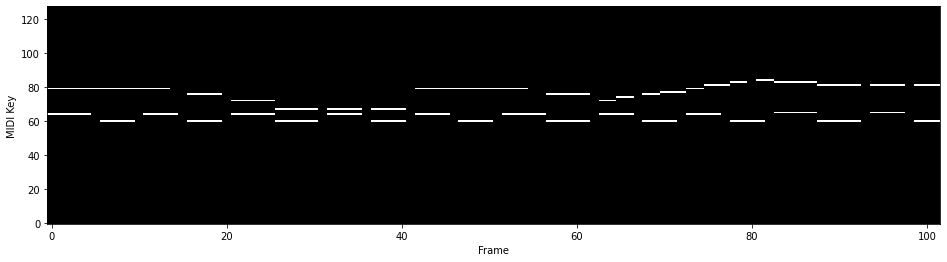

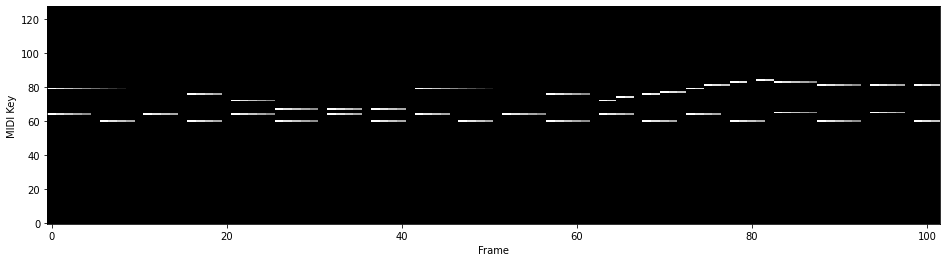

In [14]:
decayed_score_matrix = score_with_decay.to_midi_matrix(use_velocity=True)

plt.figure(figsize=(16, 4))
plt.imshow(score_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
plt.show()

plt.figure(figsize=(16, 4))
plt.imshow(decayed_score_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
plt.show()